In [10]:
# load and summarize the dataset
import pandas as pd
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_classification
import numpy as np

In [4]:
%config Completer.use_jedi = False

In [73]:
X,y = make_classification(n_samples=200, n_classes=5, weights=np.array([0.3,0.325,0.3,0.4]),n_features=10,n_informative=5 )

In [74]:
df = pd.DataFrame(data=X)

In [75]:
df.columns = ['X'+str(i) for i in df.columns.values]

In [76]:
df.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9
0,-0.940477,0.368771,3.350941,0.933164,-1.307400,-0.193991,3.712200,0.262356,0.685094,0.768134
1,1.900753,-3.269333,2.645874,0.305957,2.235315,-1.129263,2.883494,-1.267048,1.698217,0.265568
2,-0.827799,-1.706328,-1.874509,-1.620663,1.977288,-0.209607,-0.651581,1.074998,0.128223,-0.423269
3,0.737101,-1.839588,3.517397,-2.089953,-2.190972,2.449111,0.718838,-0.641772,0.187761,0.502926
4,-2.549040,0.986727,-2.126180,0.356329,1.166680,-1.178868,0.696904,-0.843061,0.408251,0.282356


In [77]:
y

array([0, 0, 3, 1, 2, 0, 1, 0, 0, 2, 2, 0, 2, 1, 2, 0, 1, 1, 2, 0, 1, 1,
       0, 3, 1, 2, 1, 2, 1, 2, 2, 0, 2, 2, 3, 2, 1, 2, 0, 0, 3, 1, 0, 0,
       1, 2, 0, 2, 0, 0, 3, 2, 3, 0, 2, 0, 1, 0, 1, 2, 2, 1, 1, 1, 2, 1,
       1, 0, 1, 2, 0, 0, 2, 3, 0, 0, 1, 3, 3, 1, 1, 0, 2, 3, 2, 0, 0, 0,
       1, 2, 2, 2, 0, 1, 2, 0, 0, 3, 0, 1, 0, 2, 2, 0, 0, 1, 0, 0, 2, 1,
       2, 0, 0, 0, 2, 1, 1, 1, 0, 2, 1, 1, 0, 3, 2, 1, 2, 0, 2, 1, 2, 2,
       2, 1, 2, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 2, 1, 1, 0, 3, 2, 2, 1, 1,
       0, 1, 0, 3, 1, 0, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 3,
       1, 0, 2, 0, 1, 1, 1, 2, 2, 0, 2, 1, 2, 0, 0, 2, 1, 0, 1, 0, 1, 2,
       0, 1])

In [78]:
le = LabelEncoder()
y = le.fit_transform(y)


In [79]:
le.classes_

array([0, 1, 2, 3])

In [80]:
Counter(y)

Counter({0: 60, 3: 15, 1: 65, 2: 60})

Class=0, n=60 (30.000%)
Class=3, n=15 (7.500%)
Class=1, n=65 (32.500%)
Class=2, n=60 (30.000%)


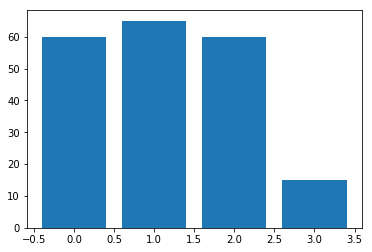

In [81]:
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

# SMOTE

In [82]:
from imblearn.over_sampling import SMOTE


In [83]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)


In [86]:
dict(Counter(y))

{0: 65, 3: 65, 1: 65, 2: 65}

Class=0, n=65 (25.000%)
Class=3, n=65 (25.000%)
Class=1, n=65 (25.000%)
Class=2, n=65 (25.000%)


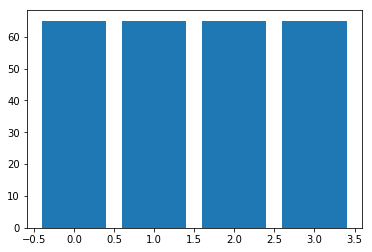

In [85]:
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

# Another example

In [90]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE # doctest: +NORMALIZE_WHITESPACE



X, y = make_classification(n_classes=2, class_sep=2,
     weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,
     n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)

print('Original dataset shape %s' % Counter(y))





sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))


Original dataset shape Counter({1: 900, 0: 100})
Resampled dataset shape Counter({0: 900, 1: 900})


### custom sampling

In [96]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE # doctest: +NORMALIZE_WHITESPACE



X, y = make_classification(n_classes=2, class_sep=2,
     weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,
     n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)

print('Original dataset shape %s' % Counter(y))




strategy = {0:700, 1:1000}

sm = SMOTE(sampling_strategy=strategy)
X_res, y_res = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({1: 900, 0: 100})
Resampled dataset shape Counter({1: 1000, 0: 700})


C:\Users\Mein Pc\.conda\envs\nlp_course\lib\site-packages\imblearn\utils\_validation.py:326: UserWarning: After over-sampling, the number of samples (1000) in class 1 will be larger than the number of samples in the majority class (class #1 -> 900)
  n_samples_majority,


In [122]:
X, y = make_classification(n_classes=2, class_sep=2,
     weights=[0.99], n_informative=3, n_redundant=1, flip_y=0,
     n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)


In [107]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

In [115]:
rf.fit(X,y)

RandomForestClassifier(n_estimators=1000)

In [137]:
rf = RandomForestClassifier(n_estimators=1000)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
scores = cross_val_score(rf, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
scores.mean()

0.999

In [136]:
# random forest applied with balanced parameter
rf = RandomForestClassifier(n_estimators=1000, class_weight='balanced')
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
scores = cross_val_score(rf, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
scores.mean()

0.999

In [135]:
### this also possible , manually defining the classes
weights = {0:1.0, 1:1.0, 2:2.0, 3:2.0, 4:2.0, 5:2.0}
model = RandomForestClassifier(n_estimators=1000, class_weight=weights)
###